In [1]:
import qiskit
import numpy as np

from Hamiltonian import generate_XYZ
from algorithm.vff import vff
from ansatz.ansatz import feature_map_ansatz
from ansatz.diagonal import diagonal_ansatz
from ansatz.helper   import len_param

from qiskit import Aer, execute
from qiskit.utils.quantum_instance import QuantumInstance

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

Build the Hamiltonian with the generate_XYZ function. 
parameters =  [parameters_W, parameters_D]
Build your ansatz as QC taking parameters stored in list or array, for example use feature_map_ansatz 
give your ansatz as instance of the vff class as function of the parameters: call them self.ansatz_W, self.ansatz_D
update the parameters with self.update(parameters), this use the AQGD (use please the custom script: the official one has a bug...) optimizer to perform the update
use "local=True" if you want to use the LHST as cost function




In [2]:
n_qubits= 2
H = generate_XYZ(J_x=1,J_y=0,J_z=0,field=1,n_spins=n_qubits)

n_layer  = 2
int_len = 2
ansatz_W = lambda parameter: feature_map_ansatz(parameter,n_qubits=n_qubits,n_layer=n_layer,
                                                interaction_length=int_len, interaction_type = 'x',full_rotation=True)
ansatz_D = lambda parameter: diagonal_ansatz(parameter,n_qubits=n_qubits)

len_param_W = len_param(n_qubits=n_qubits,n_layer = n_layer, interaction_length=int_len, full_rotation = True)
len_param_D = 2**n_layer

parameters = np.random.rand(len_param_W+len_param_D)

backend = Aer.get_backend('statevector_simulator')
instance = QuantumInstance(backend, seed_simulator=2, seed_transpiler=2)


/Users/oki/Prepa-Hackathon/qiskit025/lib/python3.8/site-packages/qiskit/quantum_info/operators/symplectic/pauli.py:185: DeprecationWarning: Initializing Pauli from `Pauli(z=z, x=x)` kwargs is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. Use tuple initialization `Pauli((z, x))` instead.
  base_z, base_x, base_phase = self._from_array_deprecated(z, x)


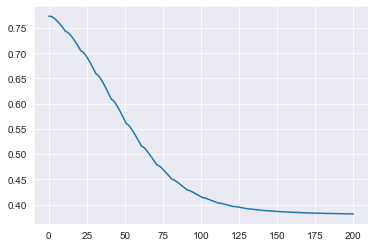

In [5]:

v = vff(hamiltonian=H, n_qubits=2, len_param_W = len_param_W, instance=instance, shots=1)
v.ansatz_W = ansatz_W
v.ansatz_D = ansatz_D
for i in range(20):
    parameters = v.update(parameters,local = False)
    
plt.figure()
plt.plot(v.cost)
plt.show()